In [72]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

matplotlib.rcParams['figure.figsize'] = (30,30)

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE']= boston.target

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [109]:
def forward_prop(x, w, bias):
    return x.dot(w) + bias

In [5]:
def init_weights(features):
    w = np.zeros(features)
    b = np.zeros(1)
    return w, b

In [6]:
def cost(y_hat, y,):
    return 0.5 / y.shape[0] * np.sum(np.square(y_hat - y))

In [135]:
def compute_gradient(y_hat, y, x):
    diff = y_hat - y
    delta_w = diff.T.dot(x) / y.shape[0]
    delta_b = np.sum(diff) / y.shape[0]
    return delta_w, delta_b

In [118]:
def train(lr, iteration, x, y):
    w, b = init_weights(x.shape[1])
    print_freq = iteration / 10 if iteration / 10 >= 1 else 1 
    for i in xrange(iteration):
        y_hat = forward_prop(x ,w,b)
        cst = cost(y_hat, bos.PRICE.as_matrix())
        d_w, d_b = compute_gradient(y_hat, y, x)
        if i % print_freq == 0:
            print "%s. cost: %s " % (i, cst)
#             print "%s. cost: %s w: %s b: %s d_w: %s d_b: %s" % (i, cst, w, b, d_w, d_b)
        w -= lr * d_w
        b -= lr * d_b
    return w, b

In [132]:
def plot_all(x, y, w, b):
    nfeat = x.shape[1]
    ncol = 2
    nrow = math.ceil(nfeat / float(ncol))
    fig = plt.figure()
    for i in xrange(x.shape[1]):
        ax = fig.add_subplot(nrow, ncol, i+1)
        ax.plot(x[:,i], forward_prop(x[:,i], w[i], b))
        ax.scatter(x[:,i], price)
    plt.show()

In [137]:
x = bos.drop('PRICE', axis=1).as_matrix()
x = sklearn.preprocessing.scale(x)
price = bos.PRICE.as_matrix()
price = sklearn.preprocessing.scale(price)
learning_rate = 0.05
iteration = 100
w, b = train(learning_rate, iteration, x, price)

(13,)
0. cost: 296.073458498 
10. cost: 291.524167111 
20. cost: 290.732253335 
30. cost: 290.344579292 
40. cost: 290.128512343 
50. cost: 290.002599062 
60. cost: 289.92576584 
70. cost: 289.876359131 
80. cost: 289.842722659 
90. cost: 289.818459267 


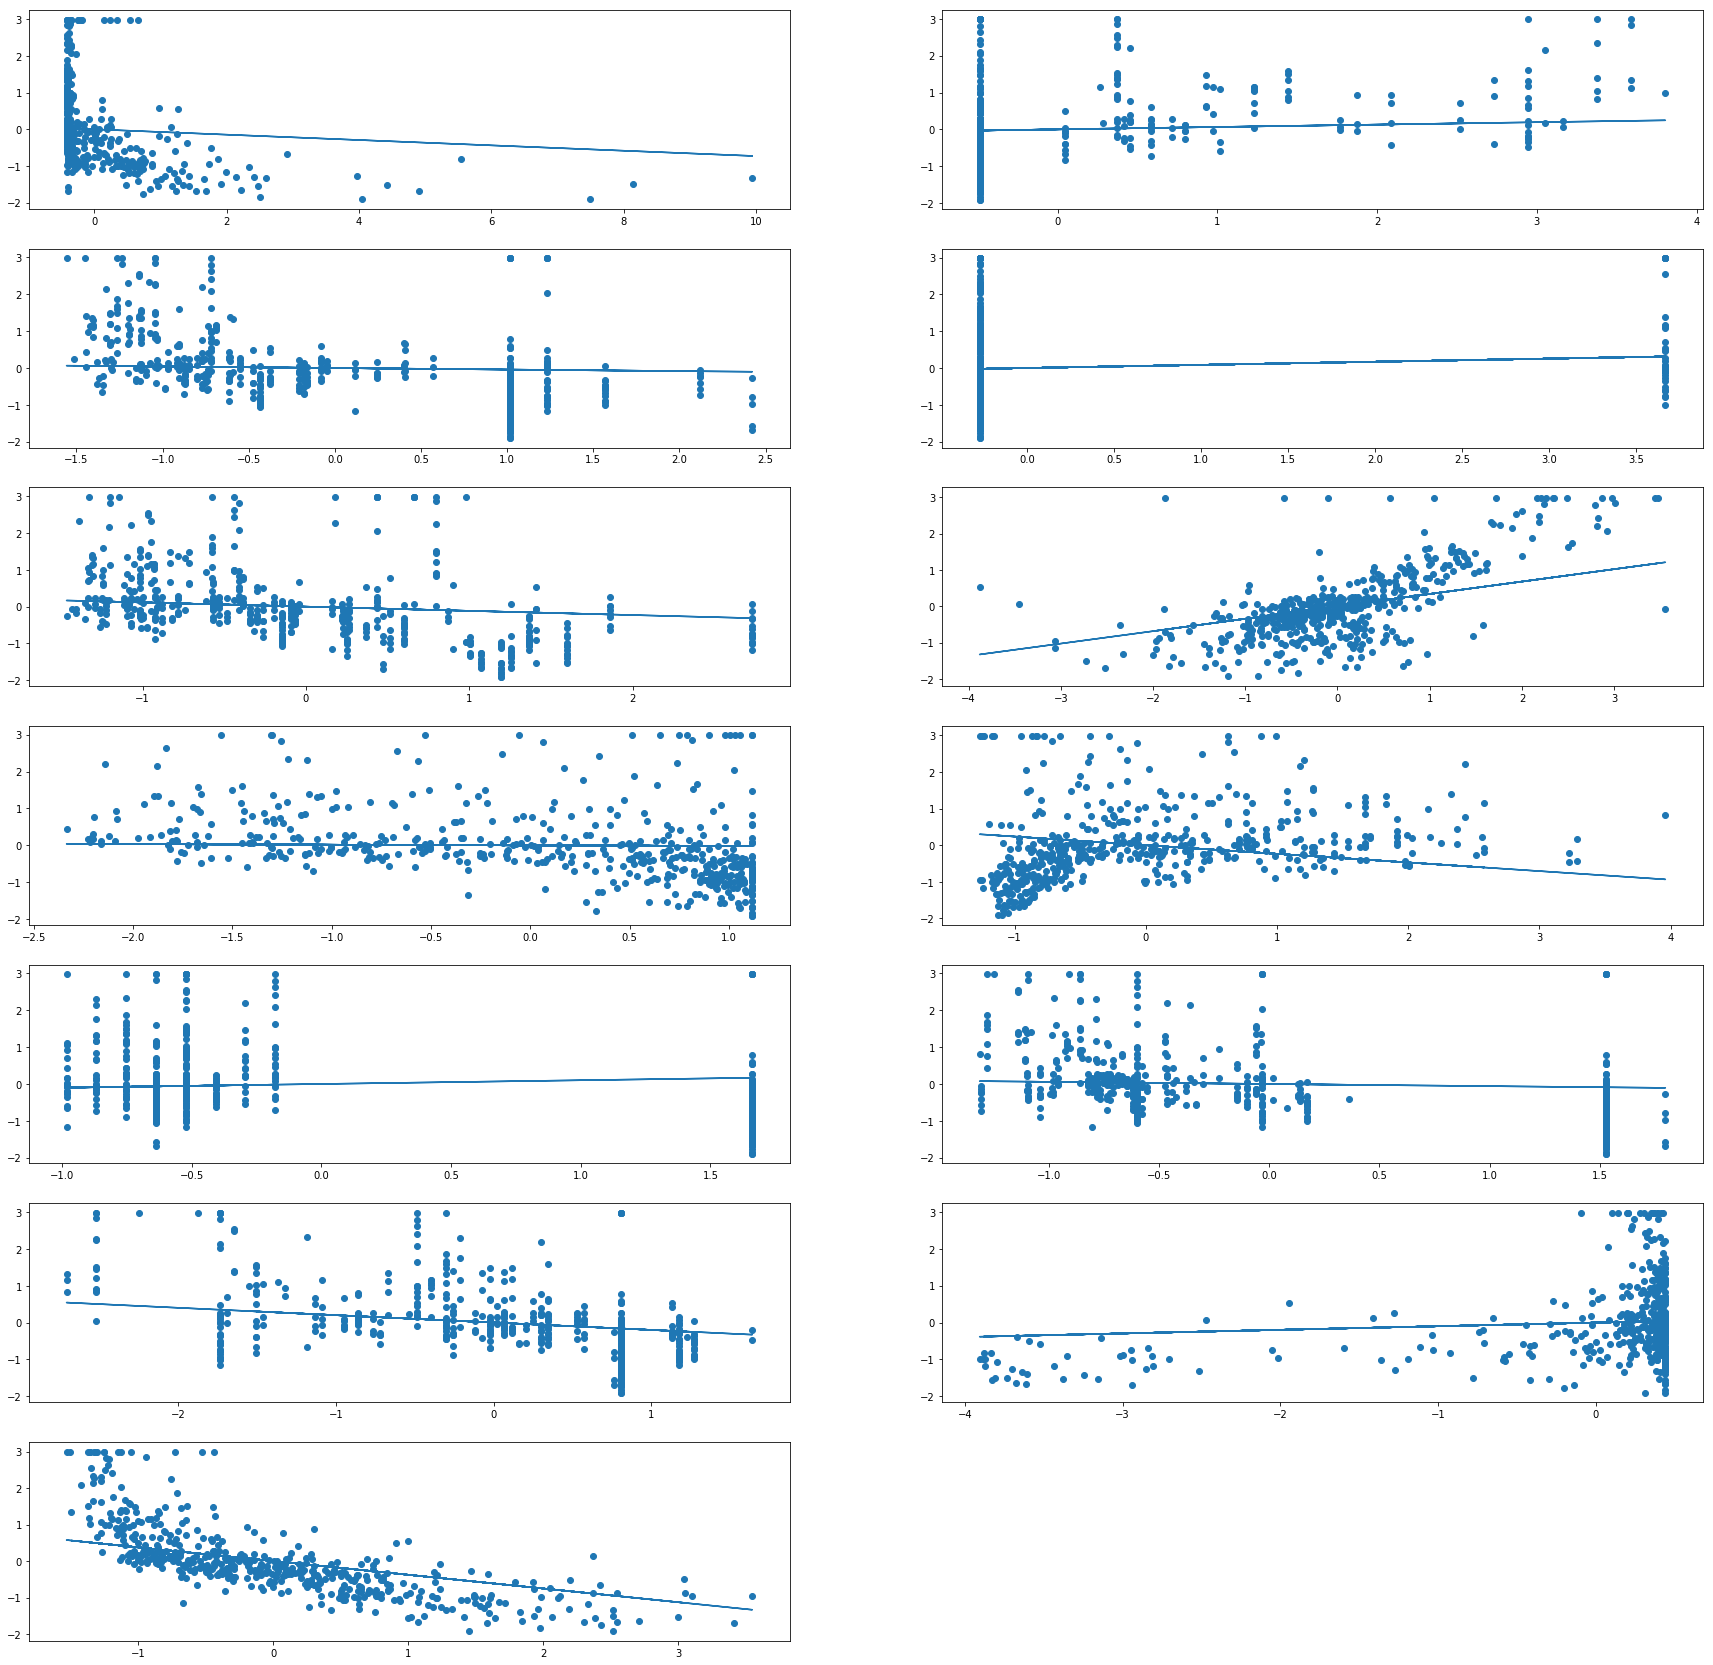

In [138]:
plot_all(x,price,w,b)

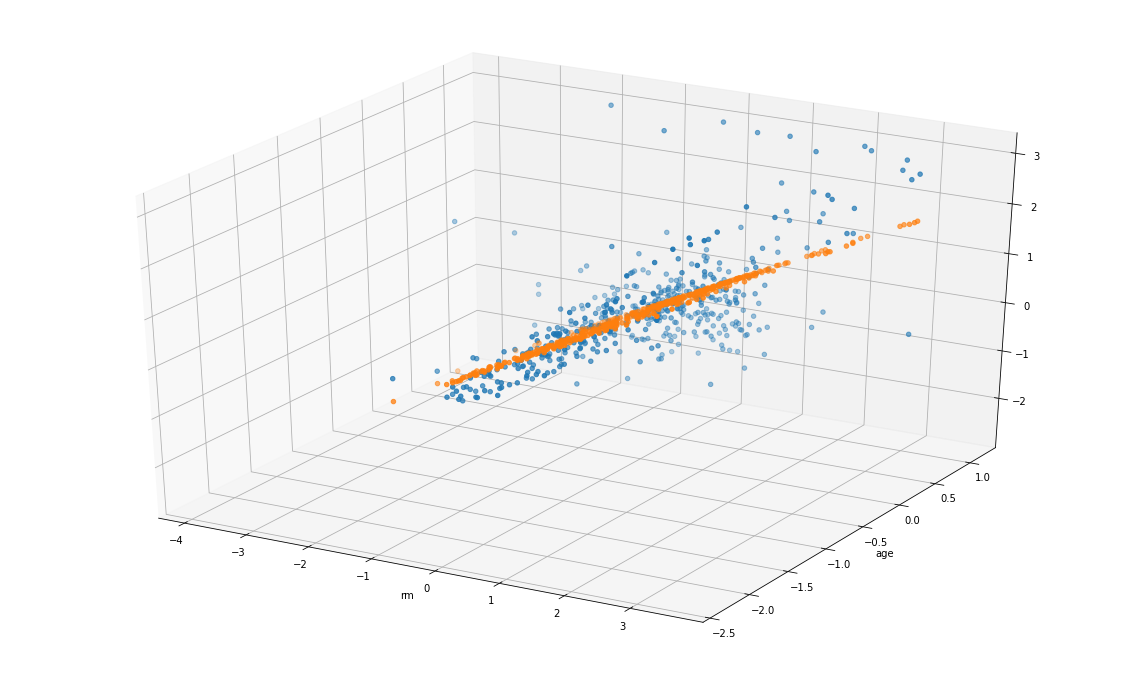

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], price)
ax.scatter(x[:,0], x[:,1], forward_prop(x,w,b))
ax.set_xlabel('rm')
ax.set_ylabel('age')
# ax.azim = 0
# ax.elev = -45
plt.show()